In [1]:
import tf_pipeline
import numpy as np
import tensorflow as tf
import sys
from cs231n.data_utils import load_CIFAR10

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
def go_train(model_func):
    for option_dict in tf_pipeline.random_search_params(options):
        print(option_dict)
        tf_pipeline.train_and_plot(
            lambda X, y, is_training: model_func(X,y,is_training, option_dict),
            X_train,
            y_train,
            X_val,
            y_val)

{'h1_strides': 4, 'max_pool': False, 'dense_size': 1024}
...........Stopping early!


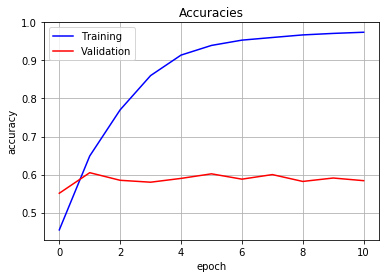


Training accuracy of 0.974
Validation accuracy of 0.584
{'h1_strides': 4, 'max_pool': True, 'dense_size': 2048}
................Stopping early!


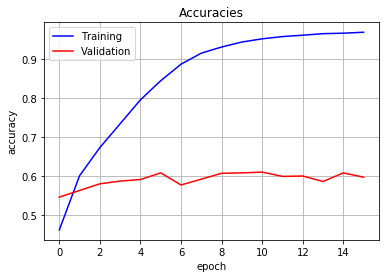


Training accuracy of 0.968
Validation accuracy of 0.597
{'h1_strides': 3, 'max_pool': False, 'dense_size': 1024}
...........Stopping early!


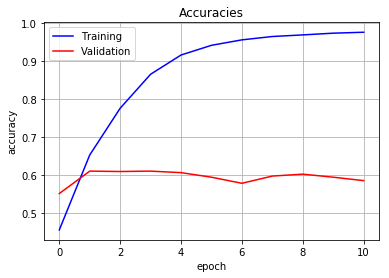


Training accuracy of 0.975
Validation accuracy of 0.585
{'h1_strides': 3, 'max_pool': True, 'dense_size': 1024}
...........Stopping early!


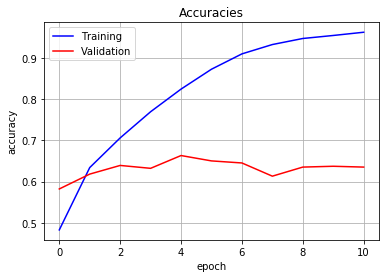


Training accuracy of 0.962
Validation accuracy of 0.635
{'h1_strides': 1, 'max_pool': True, 'dense_size': 2048}
...........Stopping early!


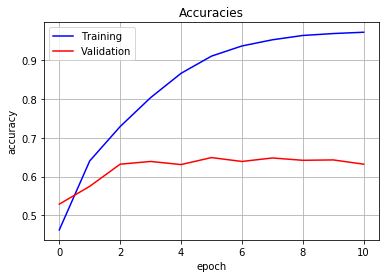


Training accuracy of 0.972
Validation accuracy of 0.632
{'h1_strides': 1, 'max_pool': False, 'dense_size': 512}
................Stopping early!


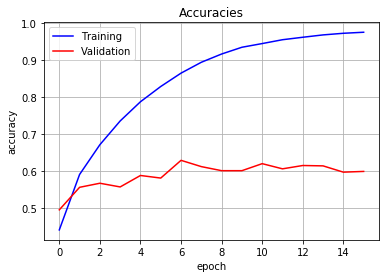


Training accuracy of 0.976
Validation accuracy of 0.599
{'h1_strides': 2, 'max_pool': True, 'dense_size': 1024}
...........Stopping early!


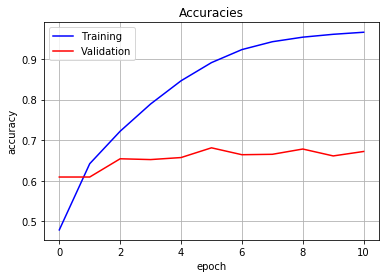


Training accuracy of 0.966
Validation accuracy of 0.672
{'h1_strides': 1, 'max_pool': True, 'dense_size': 4096}
...........Stopping early!


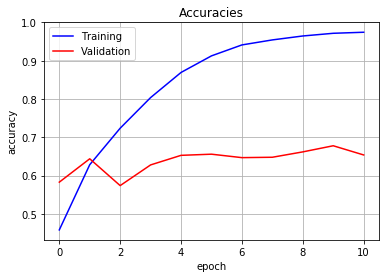


Training accuracy of 0.974
Validation accuracy of 0.654
{'h1_strides': 3, 'max_pool': True, 'dense_size': 512}
...........Stopping early!


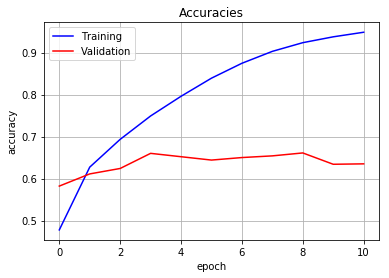


Training accuracy of 0.949
Validation accuracy of 0.635
{'h1_strides': 2, 'max_pool': True, 'dense_size': 512}
...........Stopping early!


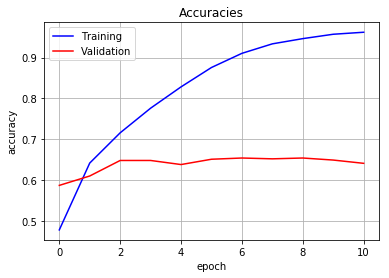


Training accuracy of 0.962
Validation accuracy of 0.641
{'h1_strides': 1, 'max_pool': False, 'dense_size': 4096}


ResourceExhaustedError: OOM when allocating tensor with shape[28800,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense/kernel/RMSProp/Assign = Assign[T=DT_FLOAT, _class=["loc:@dense/kernel/Assign"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense/kernel/RMSProp, dense/kernel/RMSProp/Initializer/ones)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dense/kernel/RMSProp/Assign', defined at:
  File "c:\programdata\anaconda3\Lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\Lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "c:\programdata\anaconda3\Lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "c:\programdata\anaconda3\Lib\asyncio\base_events.py", line 1431, in _run_once
    handle._run()
  File "c:\programdata\anaconda3\Lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-397043262760>", line 43, in <module>
    y_val)
  File "C:\Projects\SHAIP\cs231n-assignment2\tf_pipeline.py", line 41, in train_and_plot
    with TfPipeline(sandbox_model) as pipeline:
  File "C:\Projects\SHAIP\cs231n-assignment2\tf_pipeline.py", line 106, in __init__
    self.train_step = optimizer.minimize(self.mean_loss)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\training\optimizer.py", line 424, in minimize
    name=name)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\training\optimizer.py", line 600, in apply_gradients
    self._create_slots(var_list)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\training\rmsprop.py", line 117, in _create_slots
    self._name)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\training\optimizer.py", line 1129, in _get_or_make_slot_with_initializer
    var, initializer, shape, dtype, op_name)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\training\slot_creator.py", line 155, in create_slot_with_initializer
    dtype)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\training\slot_creator.py", line 65, in _create_slot_var
    validate_shape=validate_shape)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1317, in get_variable
    constraint=constraint)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1079, in get_variable
    constraint=constraint)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 425, in get_variable
    constraint=constraint)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 394, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 786, in _get_single_variable
    use_resource=use_resource)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2220, in variable
    use_resource=use_resource)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2210, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2193, in default_variable_creator
    constraint=constraint)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variables.py", line 235, in __init__
    constraint=constraint)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\variables.py", line 387, in _init_from_args
    validate_shape=validate_shape).op
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\state_ops.py", line 283, in assign
    validate_shape=validate_shape)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 63, in assign
    use_locking=use_locking, name=name)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "c:\users\dphil\.virtualenvs\cs231n-assignment2-gmxhusig\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[28800,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense/kernel/RMSProp/Assign = Assign[T=DT_FLOAT, _class=["loc:@dense/kernel/Assign"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense/kernel/RMSProp, dense/kernel/RMSProp/Initializer/ones)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [4]:
def sandbox_model(X,y,is_training, params):
    h1_strides = params['h1_strides']
    use_max_pool = params['max_pool']
    dense_size = params['dense_size']
        
    # 32 layer conv2d with 3x3 filters
    h1 = tf.layers.conv2d(X, 32, [3, 3], strides=(h1_strides, h1_strides), activation=tf.nn.relu)
    
    # batch normalization
    
    bn = tf.layers.batch_normalization(h1, axis=3, training=is_training)

    # max pooling 2x2 with stride 2
    # max_pool shape (?, 15, 15, 32)
    if use_max_pool:
        max_pool = tf.layers.max_pooling2d(bn, [2, 2], [2, 2])
    else:
        max_pool = bn
        
    # affine layer with 1024 output units and relu
    inputs = max_pool.shape[1] * max_pool.shape[2] * max_pool.shape[3]
    max_pool_flat = tf.reshape(max_pool,[-1,inputs])
    h2 = tf.layers.dense(max_pool_flat, dense_size, activation=tf.nn.relu)
    
    # affine layer 2 with 10 outputs  
    y_out = tf.layers.dense(h2, 10, activation=None)

    return y_out

options = {
    "h1_strides": [1, 2, 3, 4],
    "max_pool": [True, False],
    "dense_size": [512, 1024, 2048, 4096]
}

go_train(sandbox_model)

Experiment 1
==========

Model:
1. 32 layer conv2d with 3x3 filter size (C1). Variable stride
2. ReLU activation
3. Batch normalization
4. Optional 2x2 max pooling layer with stride 2 (P1)
5. Dense layer (D1) with variable output size
6. ReLU activation
7. Dense layer with 10 outputs (D2)

|C1 stride        |P1 enabled         |D1 output size  | Validation Accuracy |
|-----------------|-------------------|----------------|---------------------|
| 4               | No                | 1024           | 0.584               |
| 4               | Yes               | 2048           | 0.597               |
| 3               | No                | 1024           | 0.585               |
| 3               | Yes               | 1024           | 0.635               |
| 1               | Yes               | 2048           | 0.632               |
| 1               | No                | 512            | 0.599               |
| 2               | Yes               | 1024           | 0.672               |
| 1               | Yes               | 4096           | 0.654               |
| 3               | Yes               | 512            | 0.635               |
| 2               | Yes               | 512            | 0.641               |
| 1               | No                | 4096           | Out of memory       |

Conclusions
-------------
* Without pooling, the output from the convolution layer appears to be too large for my laptop GPU when D1's output size is 4096.
* Pooling seems to be useful (but haven't run enough experiments to be sure.)
* Best results for C1 stride of 2, P1 enabled and a D1 output size of 1024.

Next ideas
---------
* Set C1 stride to 2, P1 enabled and D1 output size to 1024.
* Try varying the number of layers produced by C1.
* Try adding more dense layers.

Experiment 2
------------

Model:
1. Conv2D with 3x3 filters, 2x2 stride and variable layers (C1)
2. ReLU activation
3. Batch normalization
4. Max pooling (2x2, stride 2)
5. Dense layer (1024 outputs)
6. ReLU activation
7. Dense layer (10 outputs)

{'c1_layers': 16, 'dense_layers': 2}
................Stopping early!


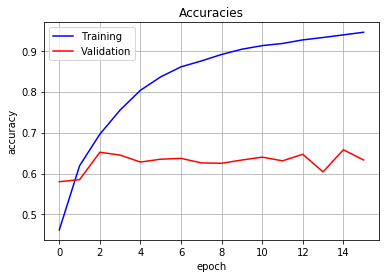


Training accuracy of 0.945
Validation accuracy of 0.633
{'c1_layers': 64, 'dense_layers': 4}
....................

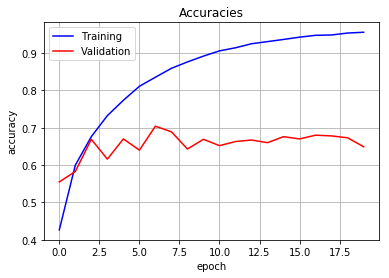


Training accuracy of 0.955
Validation accuracy of 0.649
{'c1_layers': 32, 'dense_layers': 1}
...........Stopping early!


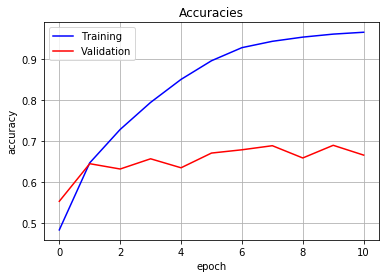


Training accuracy of 0.967
Validation accuracy of 0.666
{'c1_layers': 16, 'dense_layers': 1}
...........Stopping early!


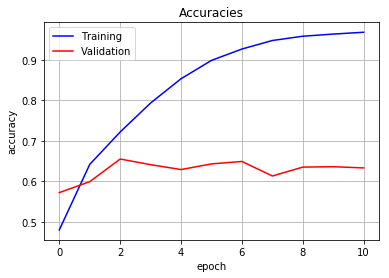


Training accuracy of 0.969
Validation accuracy of 0.633
{'c1_layers': 8, 'dense_layers': 4}
.....

In [ ]:
def exp2_model(X,y,is_training, params):
    c1_layers = params['c1_layers']
    dense_layers = params['dense_layers']
        
    c1 = tf.layers.conv2d(X, c1_layers, [3, 3], strides=(2, 2), activation=tf.nn.relu)
    bn = tf.layers.batch_normalization(c1, axis=3, training=is_training)
    max_pool = tf.layers.max_pooling2d(bn, [2, 2], [2, 2])
        
    # affine layer with 1024 output units and relu
    inputs = max_pool.shape[1] * max_pool.shape[2] * max_pool.shape[3]
    max_pool_flat = tf.reshape(max_pool,[-1,inputs])
    previous_layer = max_pool_flat
    for layers in range(dense_layers):
        previous_layer = tf.layers.dense(previous_layer, 1024, activation=tf.nn.relu)
    
    # affine layer 2 with 10 outputs  
    y_out = tf.layers.dense(previous_layer, 10, activation=None)

    return y_out

options = {
    "c1_layers": [1, 2, 4, 8, 16, 32, 64],
    "dense_layers": [1, 2, 4, 10]
}

go_train(exp2_model)